In [238]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [309]:
def getDf(path = '../resources/augmentation'):
  all_folder = os.listdir(path)
  df = pd.DataFrame(columns=['number_img', 'disease', 'disease_family', 'healthy', 'specie'], index=all_folder)

  for name_folder in all_folder:
    files = os.listdir(f"{path}/{name_folder}");
    name_splited = name_folder.split('___')
    df.loc[name_folder].specie = name_splited[0].lower()
    df.loc[name_folder].number_img = len(files)
    df.loc[name_folder].disease = name_splited[-1].lower()
    df.loc[name_folder].disease_family = df.loc[name_folder].disease.split('_')[-1].replace(')', '')
    df.loc[name_folder].healthy = name_splited[-1] == 'healthy'
  return df

In [404]:
df_augmentation = getDf('../resources/augmentation')
df_no_augmentation = getDf('../resources/no_augmentation')
display(df_augmentation.head(5))
display(df_no_augmentation.head(5))

,number_img,disease,disease_family,healthy,specie
Strawberry___healthy,1000,healthy,healthy,True,strawberry
Grape___Black_rot,1180,black_rot,rot,False,grape
Potato___Early_blight,1000,early_blight,blight,False,potato
Blueberry___healthy,1502,healthy,healthy,True,blueberry
Cherry___Powdery_mildew,1052,powdery_mildew,mildew,False,cherry


,number_img,disease,disease_family,healthy,specie
Strawberry___healthy,456,healthy,healthy,True,strawberry
Grape___Black_rot,1180,black_rot,rot,False,grape
Potato___Early_blight,1000,early_blight,blight,False,potato
Blueberry___healthy,1502,healthy,healthy,True,blueberry
Cherry___Powdery_mildew,1052,powdery_mildew,mildew,False,cherry


# Number of images by files

<AxesSubplot:xlabel='number_img'>

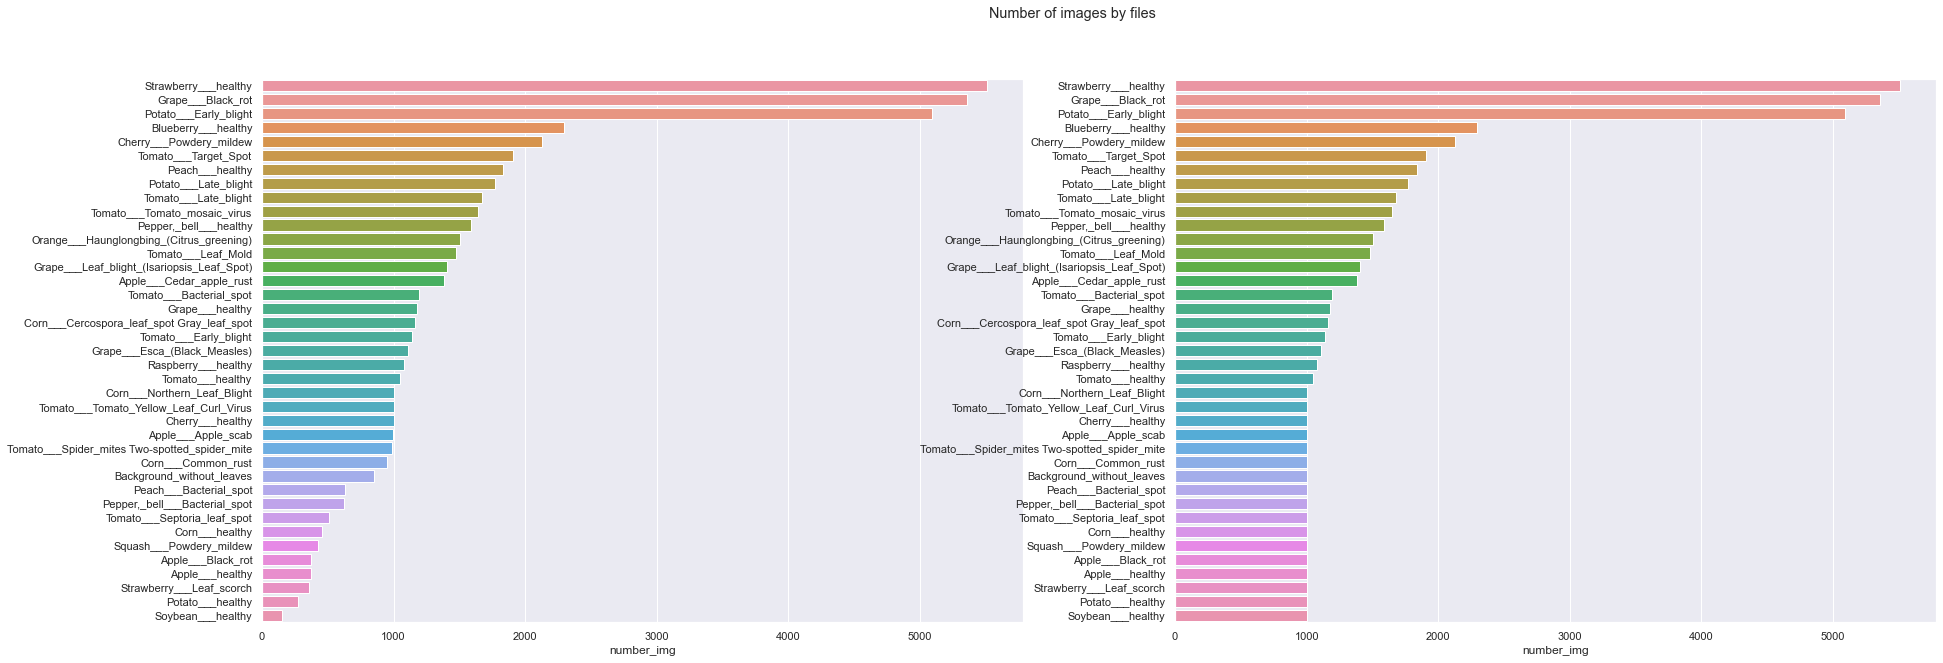

In [406]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Number of images by files')

sns.barplot(ax=axes[0], y=df_no_augmentation.index, x='number_img', data=df_no_augmentation.sort_values(by=['number_img'], ascending=False))
sns.barplot(ax=axes[1], y=df_augmentation.index, x='number_img', data=df_augmentation.sort_values(by=['number_img'], ascending=False))

# Species and number of images

Text(0.5, 1.0, 'with augmentation')

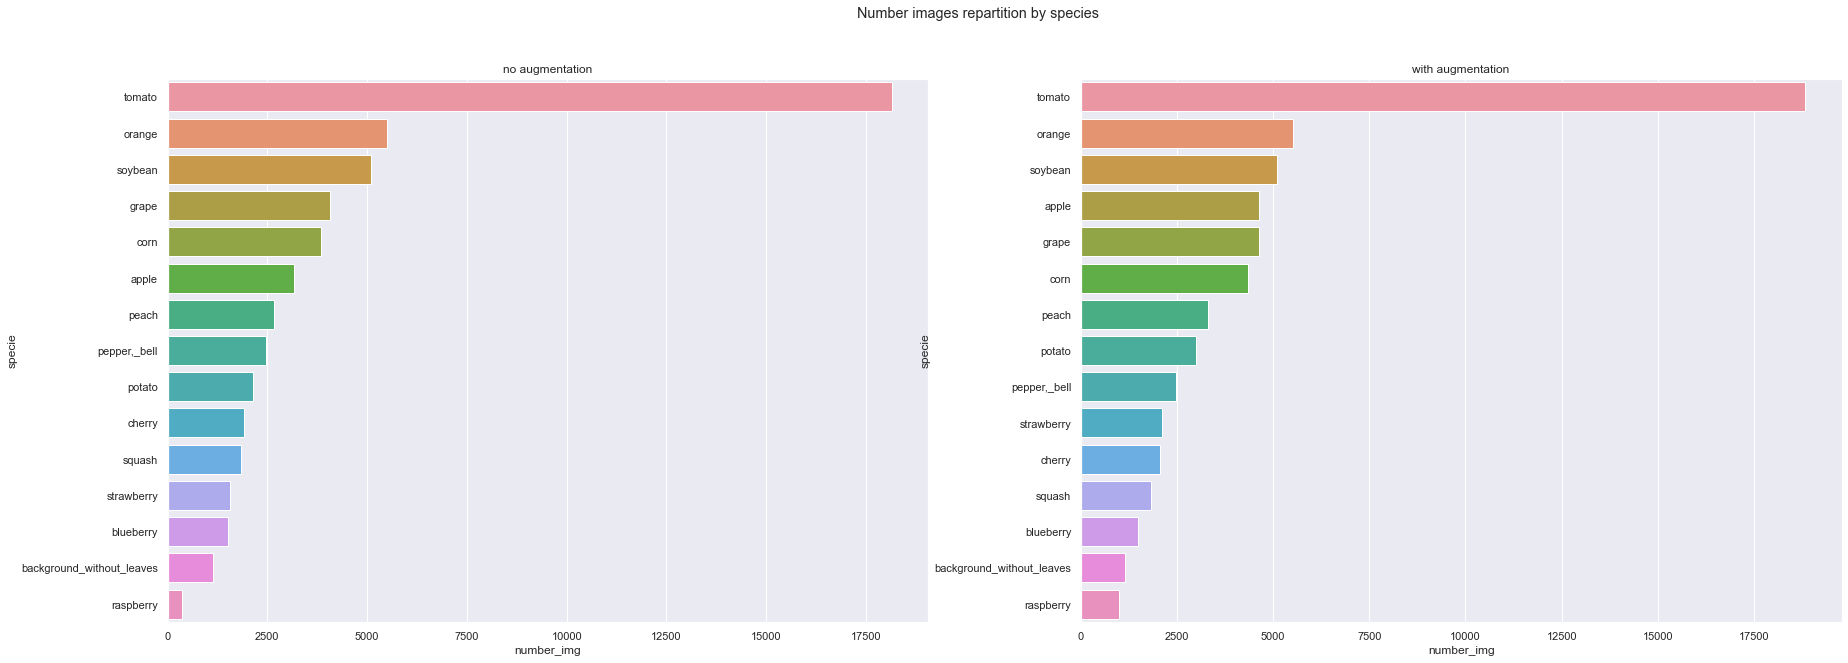

In [457]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Number images repartition by species')

df_no_augmentation_groupby_specie = df_no_augmentation.groupby(by='specie').sum()
df_no_augmentation_groupby_specie.reset_index(inplace=True)

df_augmentation_groupby_specie = df_augmentation.groupby(by='specie').sum()
df_augmentation_groupby_specie.reset_index(inplace=True)


sns.barplot(ax=axes[0], x="number_img", y="specie", data=df_no_augmentation_groupby_specie, order=df_no_augmentation_groupby_specie.sort_values('number_img', ascending=False).specie)
sns.barplot(ax=axes[1], x="number_img", y="specie", data=df_augmentation_groupby_specie, order=df_augmentation_groupby_specie.sort_values('number_img', ascending=False).specie)

axes[0].set_title('no augmentation')
axes[1].set_title('with augmentation')

# Healthy repartition

Text(0.5, 1.0, 'with augmentation')

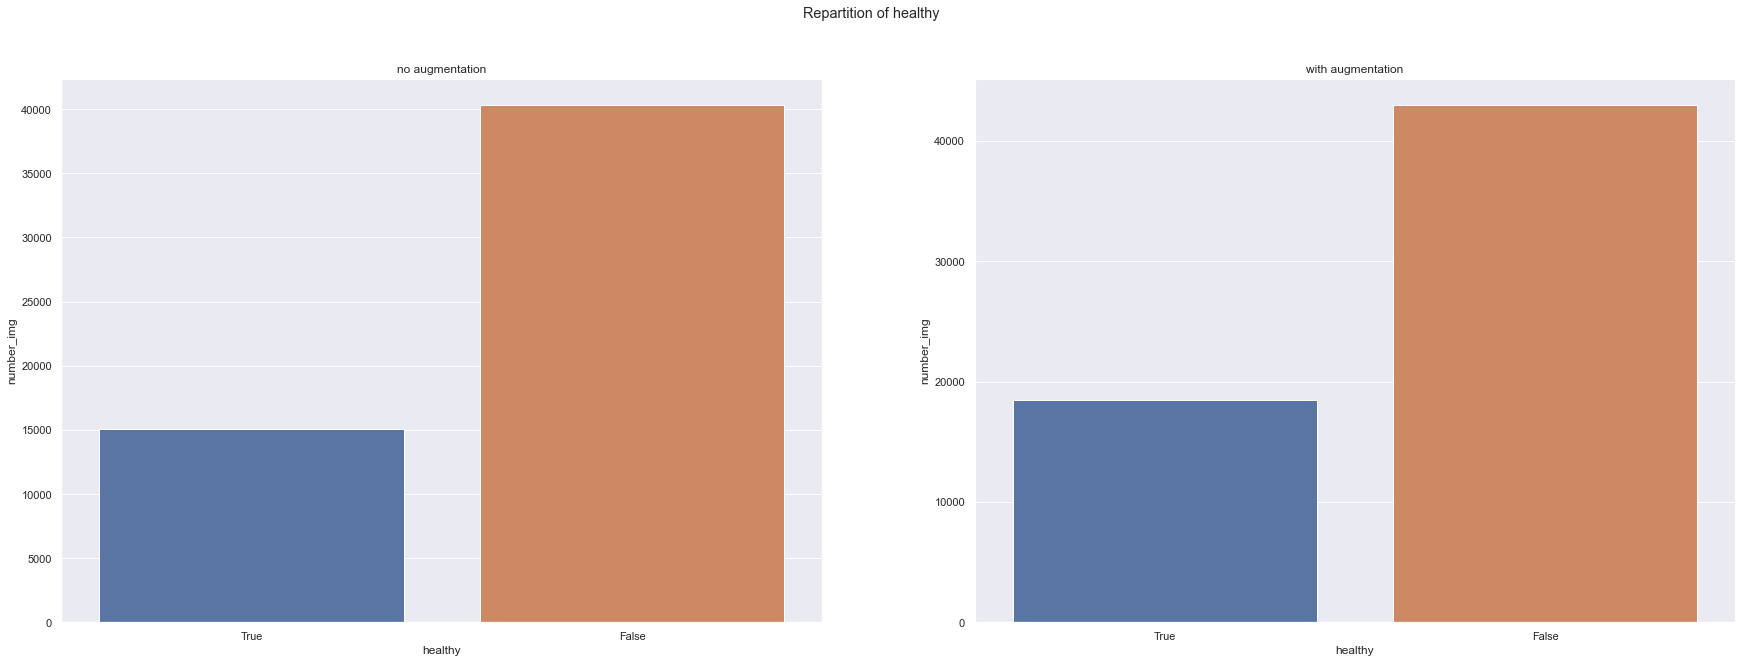

In [441]:
df_no_healthy = df_no_augmentation.copy()
df_no_healthy.healthy = df_no_healthy.healthy.astype(str)
df_no_healthy = df_no_healthy.groupby(by='healthy').sum()
df_no_healthy.reset_index(inplace=True)
df_no_healthy = df_no_healthy.sort_values('healthy', ascending=False)

df_healthy = df_augmentation.copy()
df_healthy.healthy = df_healthy.healthy.astype(str)
df_healthy = df_healthy.groupby(by='healthy').sum()
df_healthy.reset_index(inplace=True)
df_healthy = df_healthy.sort_values('healthy', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Repartition of healthy')

sns.barplot(ax=axes[0], y="number_img", x="healthy", data=df_no_healthy)
sns.barplot(ax=axes[1], y="number_img", x="healthy", data=df_healthy)

axes[0].set_title('no augmentation')
axes[1].set_title('with augmentation')

Text(0.5, 1.0, 'with augmentation')

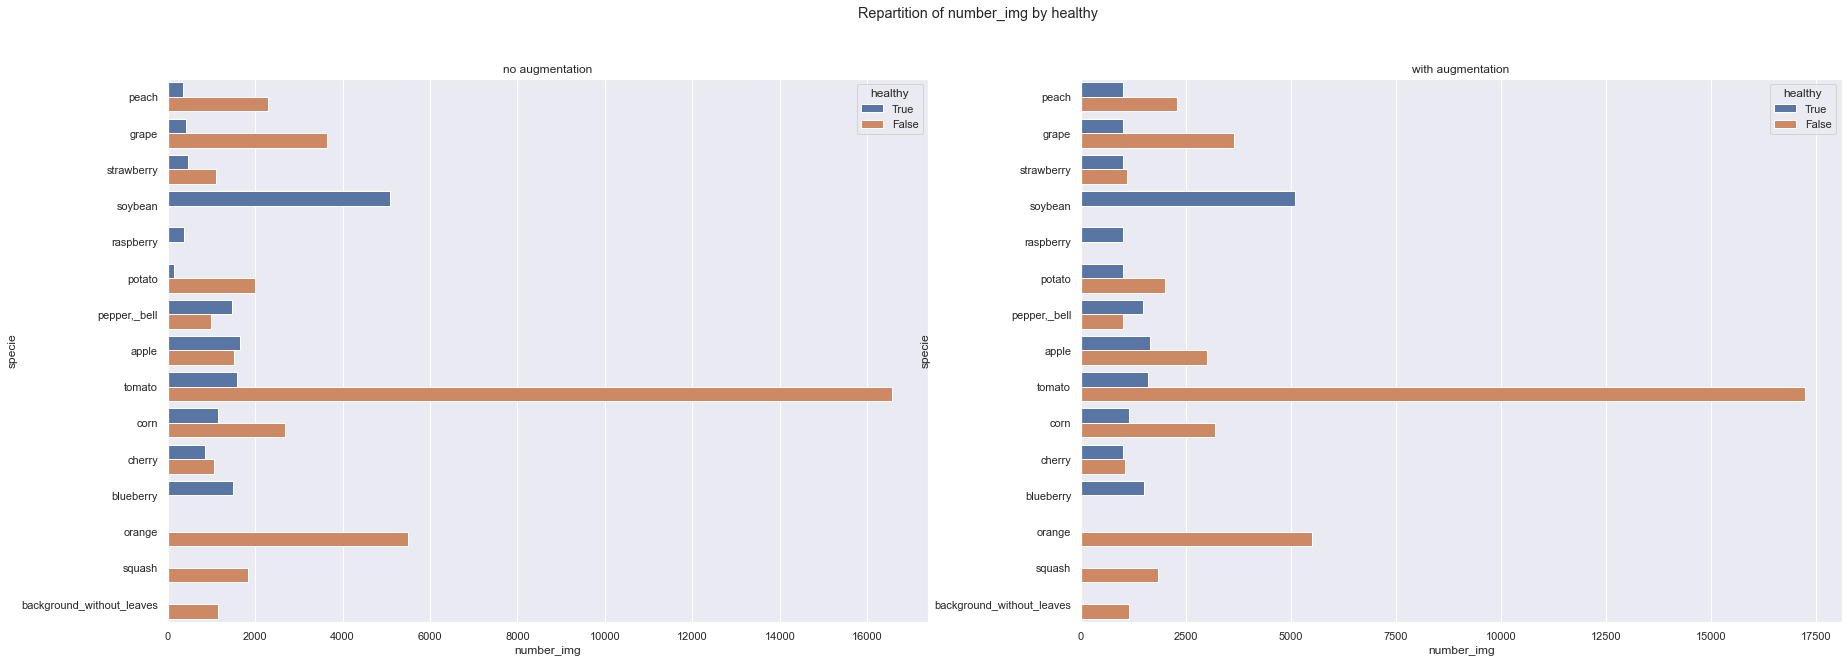

In [507]:
df_no_aug_health = df_no_augmentation.copy()
df_no_aug_health.healthy = df_no_aug_health.healthy.astype(str)
df_no_aug_health = df_no_aug_health.groupby(['specie', 'healthy']).sum()
df_no_aug_health.reset_index(inplace=True)
df_no_aug_health = df_no_aug_health.sort_values('healthy', ascending=False)

df_aug_health = df_augmentation.copy()
df_aug_health.healthy = df_aug_health.healthy.astype(str)
df_aug_health = df_aug_health.groupby(['specie', 'healthy']).sum()
df_aug_health.reset_index(inplace=True)
df_aug_health = df_aug_health.sort_values('healthy', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Repartition of number_img by healthy')

sns.barplot(ax=axes[0], x="number_img", y="specie", hue="healthy", data=df_no_aug_health)
sns.barplot(ax=axes[1], x="number_img", y="specie", hue="healthy", data=df_aug_health)
axes[0].set_title('no augmentation')
axes[1].set_title('with augmentation')

- `squash, orange` have no healthy directory.
- `soybean, raspberry blueberry` have no disease directory.

# Disease repartition


    ____________________________________________________________________________________________________________________________________________________________________
      For tomato

      -----------------------------------------------------------------------------------------
         Without augmentation:                                         With augmentation:     
      ___________________________                                   ---------------------------
         MAXIMUM: 5357                                                 MAXIMUM: 5357           
         MINIMUM: 373                                                  MINIMUM: 1000           
         DIFFERENCE: 4984                                              DIFFERENCE: 4357        
      ___________________________                                   ___________________________

    


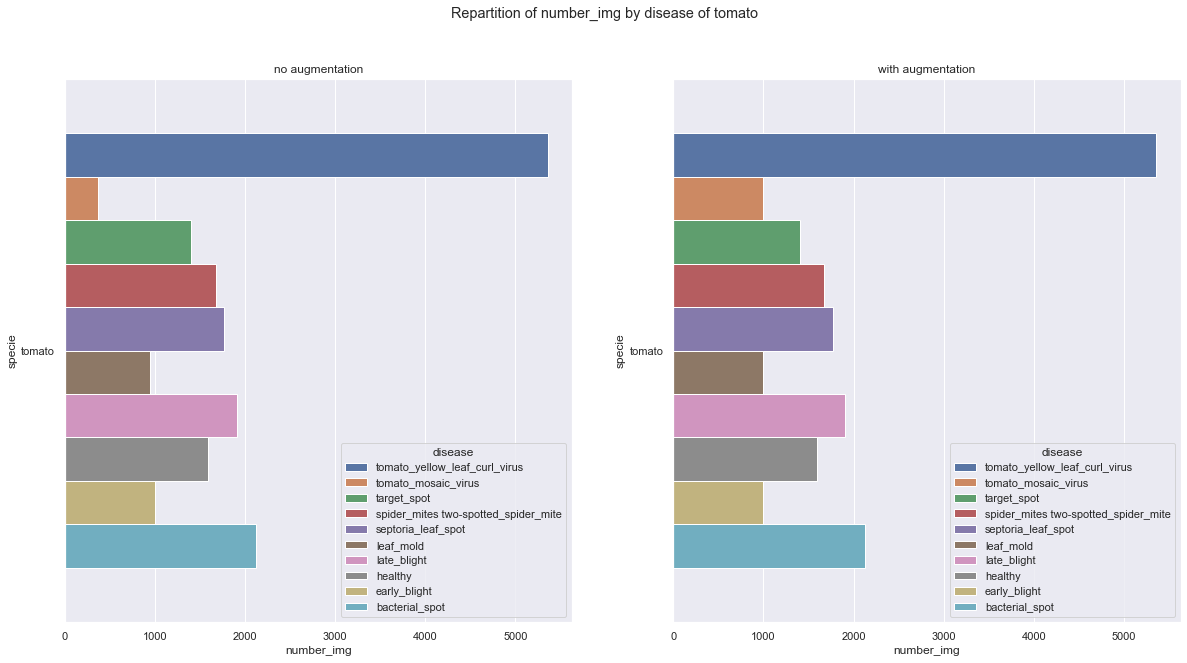


    ____________________________________________________________________________________________________________________________________________________________________
      For cherry

      -----------------------------------------------------------------------------------------
         Without augmentation:                                         With augmentation:     
      ___________________________                                   ---------------------------
         MAXIMUM: 1052                                                 MAXIMUM: 1052           
         MINIMUM: 854                                                  MINIMUM: 1000           
         DIFFERENCE: 198                                              DIFFERENCE: 52        
      ___________________________                                   ___________________________

    


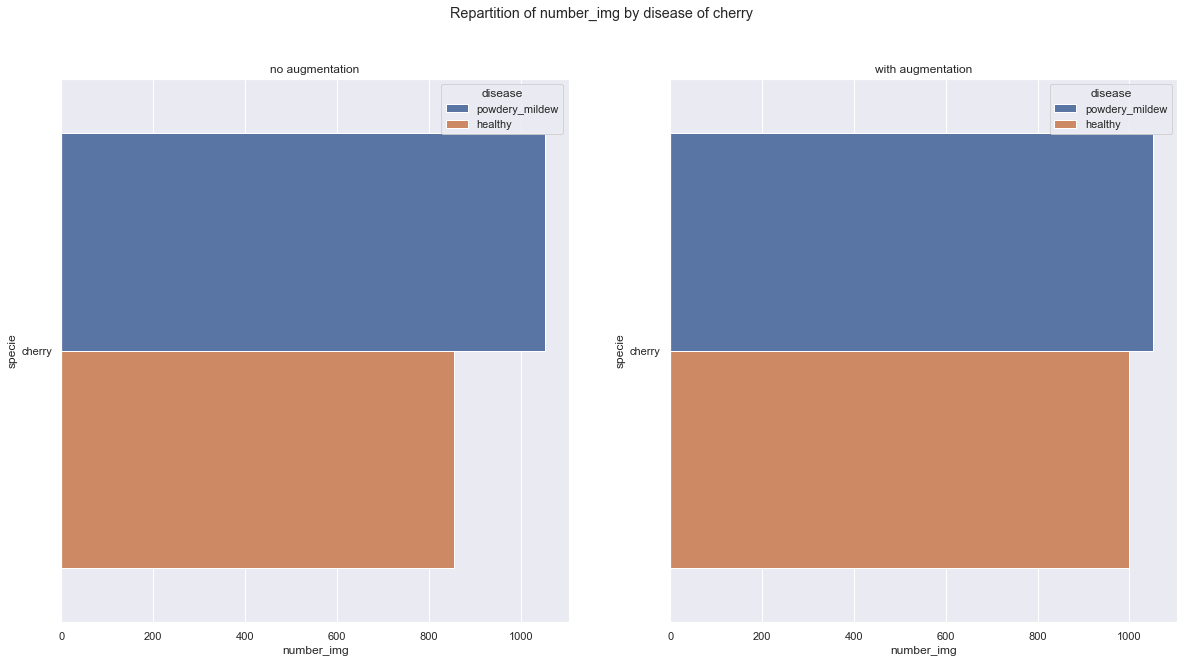


    ____________________________________________________________________________________________________________________________________________________________________
      For corn

      -----------------------------------------------------------------------------------------
         Without augmentation:                                         With augmentation:     
      ___________________________                                   ---------------------------
         MAXIMUM: 1192                                                 MAXIMUM: 1192           
         MINIMUM: 513                                                  MINIMUM: 1000           
         DIFFERENCE: 679                                              DIFFERENCE: 192        
      ___________________________                                   ___________________________

    


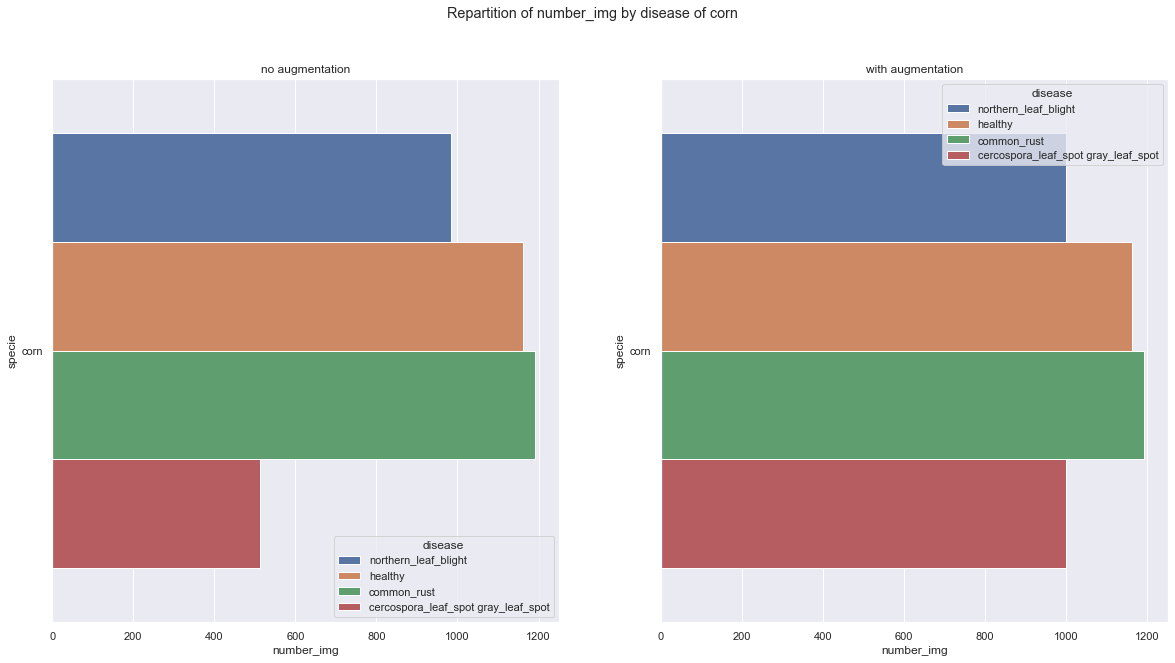


    ____________________________________________________________________________________________________________________________________________________________________
      For strawberry

      -----------------------------------------------------------------------------------------
         Without augmentation:                                         With augmentation:     
      ___________________________                                   ---------------------------
         MAXIMUM: 1109                                                 MAXIMUM: 1109           
         MINIMUM: 456                                                  MINIMUM: 1000           
         DIFFERENCE: 653                                              DIFFERENCE: 109        
      ___________________________                                   ___________________________

    


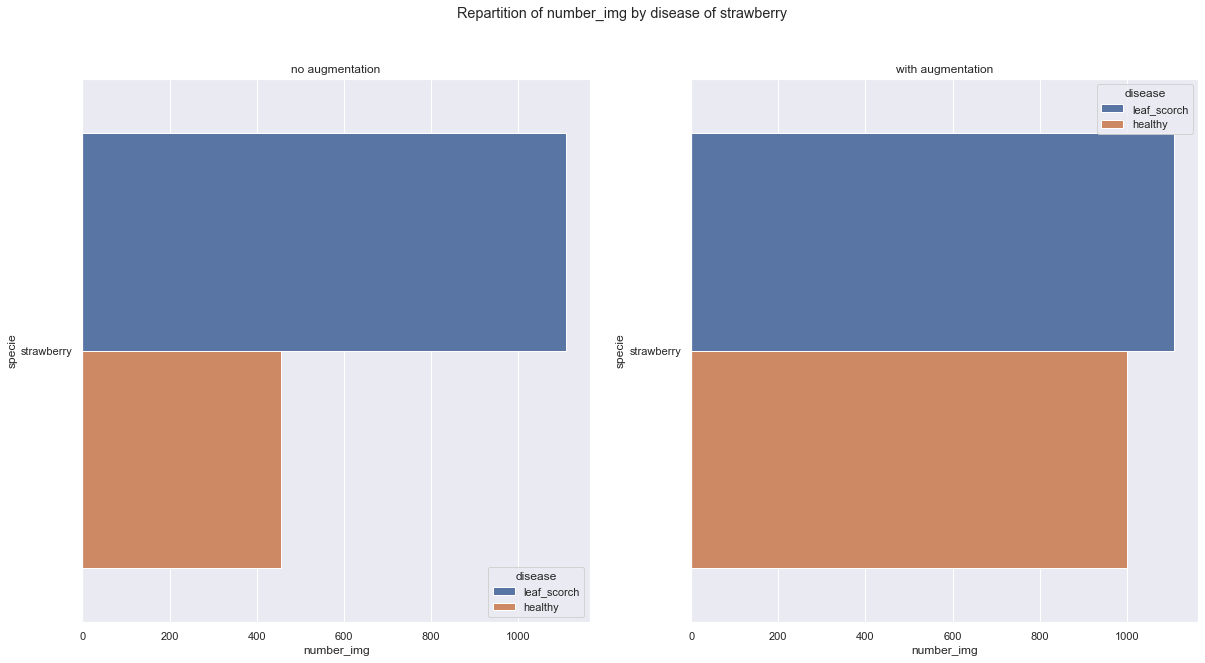


    ____________________________________________________________________________________________________________________________________________________________________
      For grape

      -----------------------------------------------------------------------------------------
         Without augmentation:                                         With augmentation:     
      ___________________________                                   ---------------------------
         MAXIMUM: 1383                                                 MAXIMUM: 1383           
         MINIMUM: 423                                                  MINIMUM: 1000           
         DIFFERENCE: 960                                              DIFFERENCE: 383        
      ___________________________                                   ___________________________

    


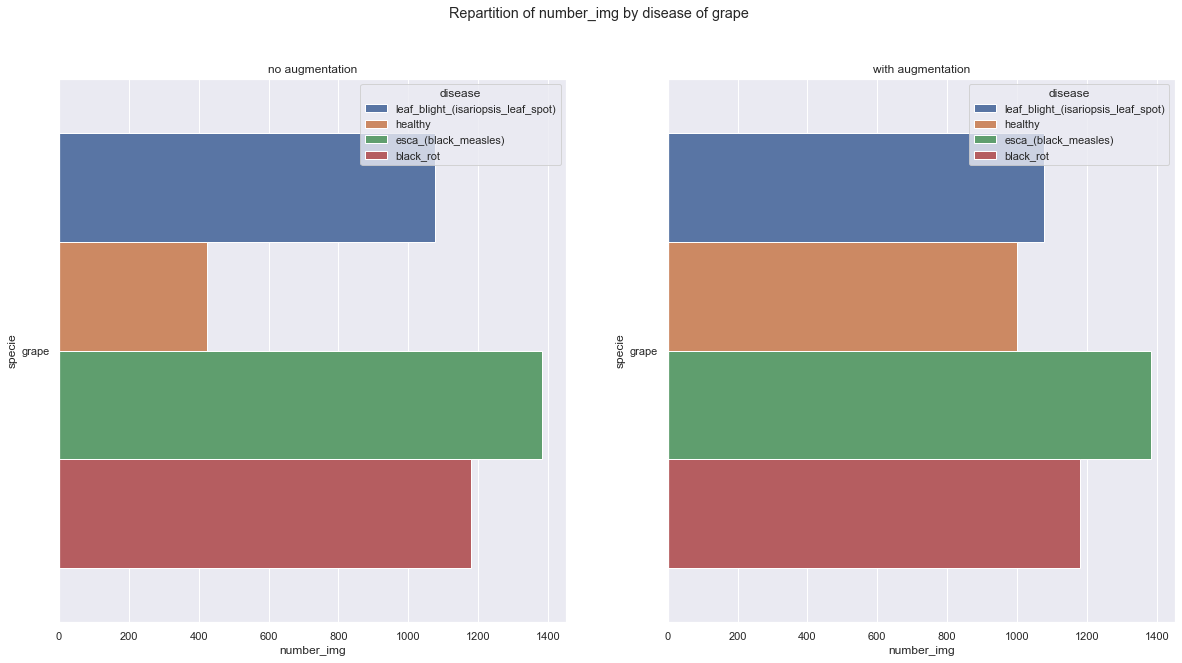


    ____________________________________________________________________________________________________________________________________________________________________
      For potato

      -----------------------------------------------------------------------------------------
         Without augmentation:                                         With augmentation:     
      ___________________________                                   ---------------------------
         MAXIMUM: 1000                                                 MAXIMUM: 1000           
         MINIMUM: 152                                                  MINIMUM: 1000           
         DIFFERENCE: 848                                              DIFFERENCE: 0        
      ___________________________                                   ___________________________

    


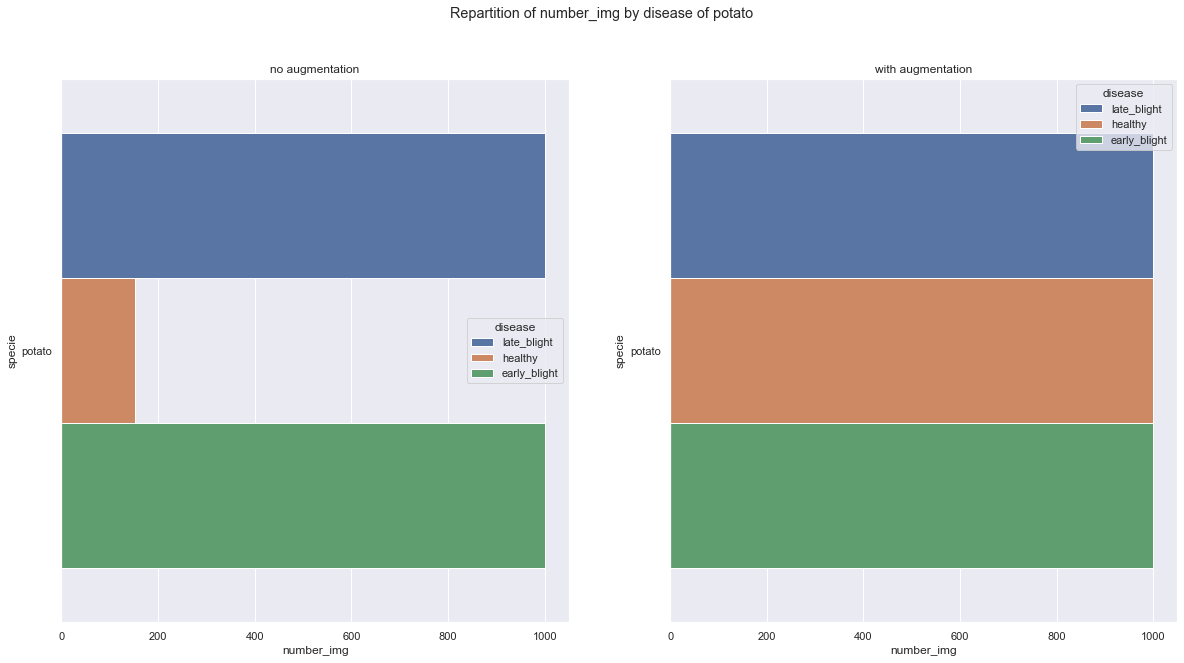


    ____________________________________________________________________________________________________________________________________________________________________
      For pepper,_bell

      -----------------------------------------------------------------------------------------
         Without augmentation:                                         With augmentation:     
      ___________________________                                   ---------------------------
         MAXIMUM: 1478                                                 MAXIMUM: 1478           
         MINIMUM: 997                                                  MINIMUM: 1000           
         DIFFERENCE: 481                                              DIFFERENCE: 478        
      ___________________________                                   ___________________________

    


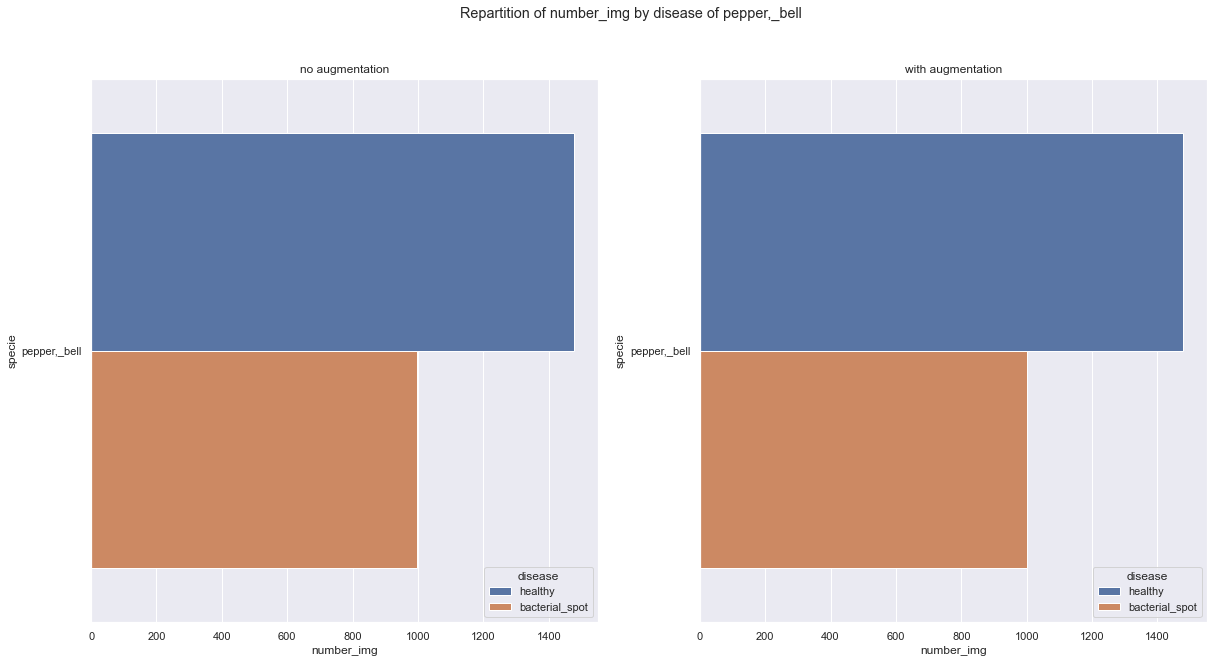


    ____________________________________________________________________________________________________________________________________________________________________
      For apple

      -----------------------------------------------------------------------------------------
         Without augmentation:                                         With augmentation:     
      ___________________________                                   ---------------------------
         MAXIMUM: 1645                                                 MAXIMUM: 1645           
         MINIMUM: 275                                                  MINIMUM: 1000           
         DIFFERENCE: 1370                                              DIFFERENCE: 645        
      ___________________________                                   ___________________________

    


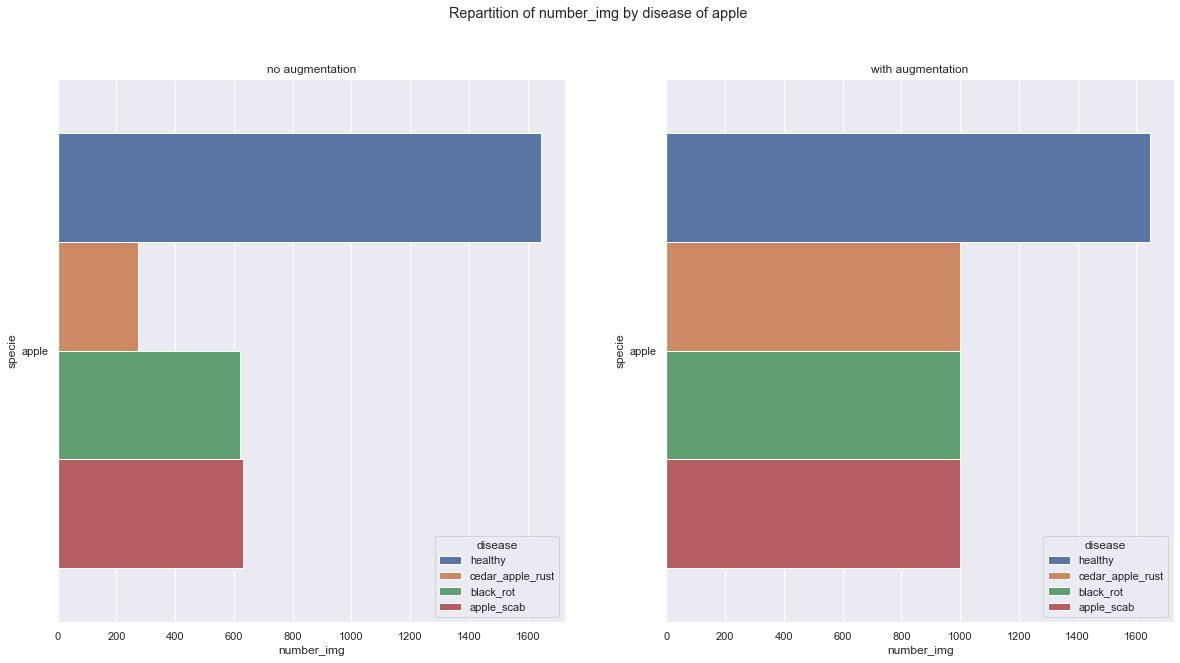


    ____________________________________________________________________________________________________________________________________________________________________
      For peach

      -----------------------------------------------------------------------------------------
         Without augmentation:                                         With augmentation:     
      ___________________________                                   ---------------------------
         MAXIMUM: 2297                                                 MAXIMUM: 2297           
         MINIMUM: 360                                                  MINIMUM: 1000           
         DIFFERENCE: 1937                                              DIFFERENCE: 1297        
      ___________________________                                   ___________________________

    


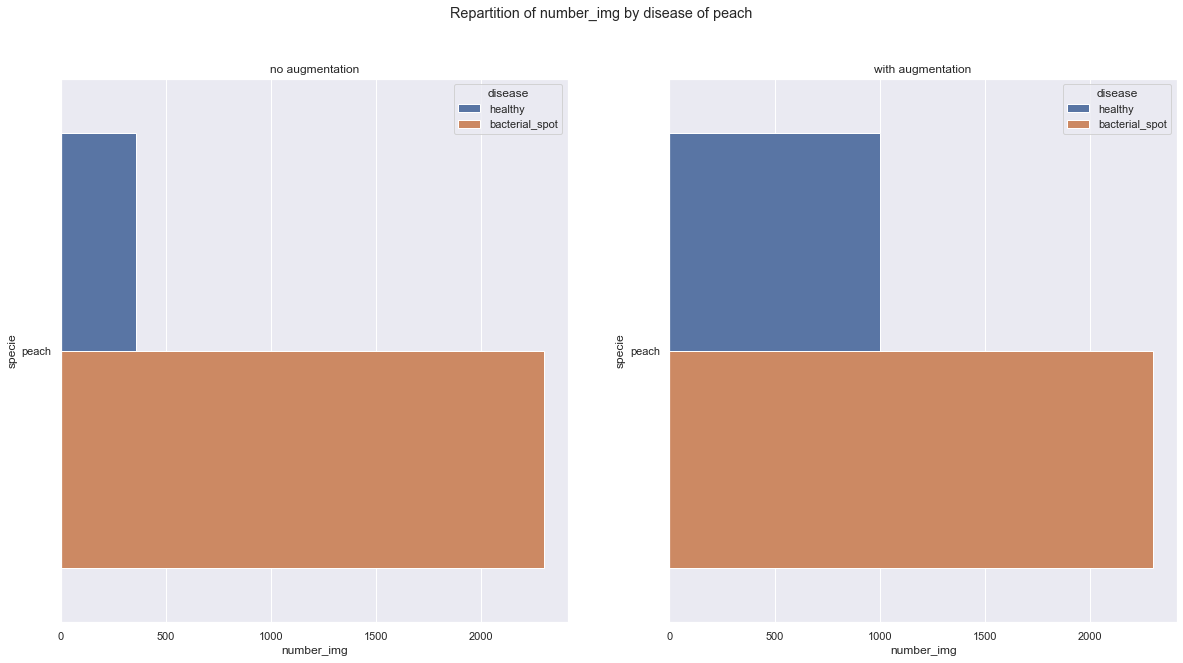

In [578]:
df_no_aug_group_disease = df_no_augmentation.copy()
df_no_aug_group_disease.healthy = df_no_aug_group_disease.healthy.astype(str)
df_no_aug_group_disease = df_no_aug_group_disease.groupby(['specie', 'disease']).sum()
df_no_aug_group_disease.reset_index(inplace=True)
df_no_aug_group_disease = df_no_aug_group_disease.sort_values('disease', ascending=False)

df_aug_group_disease = df_augmentation.copy()
df_aug_group_disease.healthy = df_aug_group_disease.healthy.astype(str)
df_aug_group_disease = df_aug_group_disease.groupby(['specie', 'disease']).sum()
df_aug_group_disease.reset_index(inplace=True)
df_aug_group_disease = df_aug_group_disease.sort_values('disease', ascending=False)


keys = df_no_aug_group_disease.specie.drop_duplicates().reset_index().specie.values

for key in keys:
  current_no_df = df_no_aug_group_disease[df_no_aug_group_disease['specie'] == key]
  current_df = df_aug_group_disease[df_no_aug_group_disease['specie'] == key]

  if len(current_df) > 1:
    print(f"""
    ____________________________________________________________________________________________________________________________________________________________________
      For {key}

      -----------------------------------------------------------------------------------------
         Without augmentation:                                         With augmentation:     
      ___________________________                                   ---------------------------
         MAXIMUM: {current_no_df['number_img'].max()}                                                 MAXIMUM: {current_df['number_img'].max()}           
         MINIMUM: {current_no_df['number_img'].min()}                                                  MINIMUM: {current_df['number_img'].min()}           
         DIFFERENCE: {current_no_df['number_img'].max() - current_no_df['number_img'].min()}                                              DIFFERENCE: {current_df['number_img'].max() - current_df['number_img'].min()}        
      ___________________________                                   ___________________________

    """)
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    fig.suptitle(f'Repartition of number_img by disease of {key}')

    sns.barplot(ax=axes[0], x="number_img", y="specie", hue="disease", data=current_no_df)
    sns.barplot(ax=axes[1], x="number_img", y="specie", hue="disease", data=current_df)
    axes[0].set_title('no augmentation')
    axes[1].set_title('with augmentation')
    plt.show()




Text(0.5, 1.0, 'with augmentation')

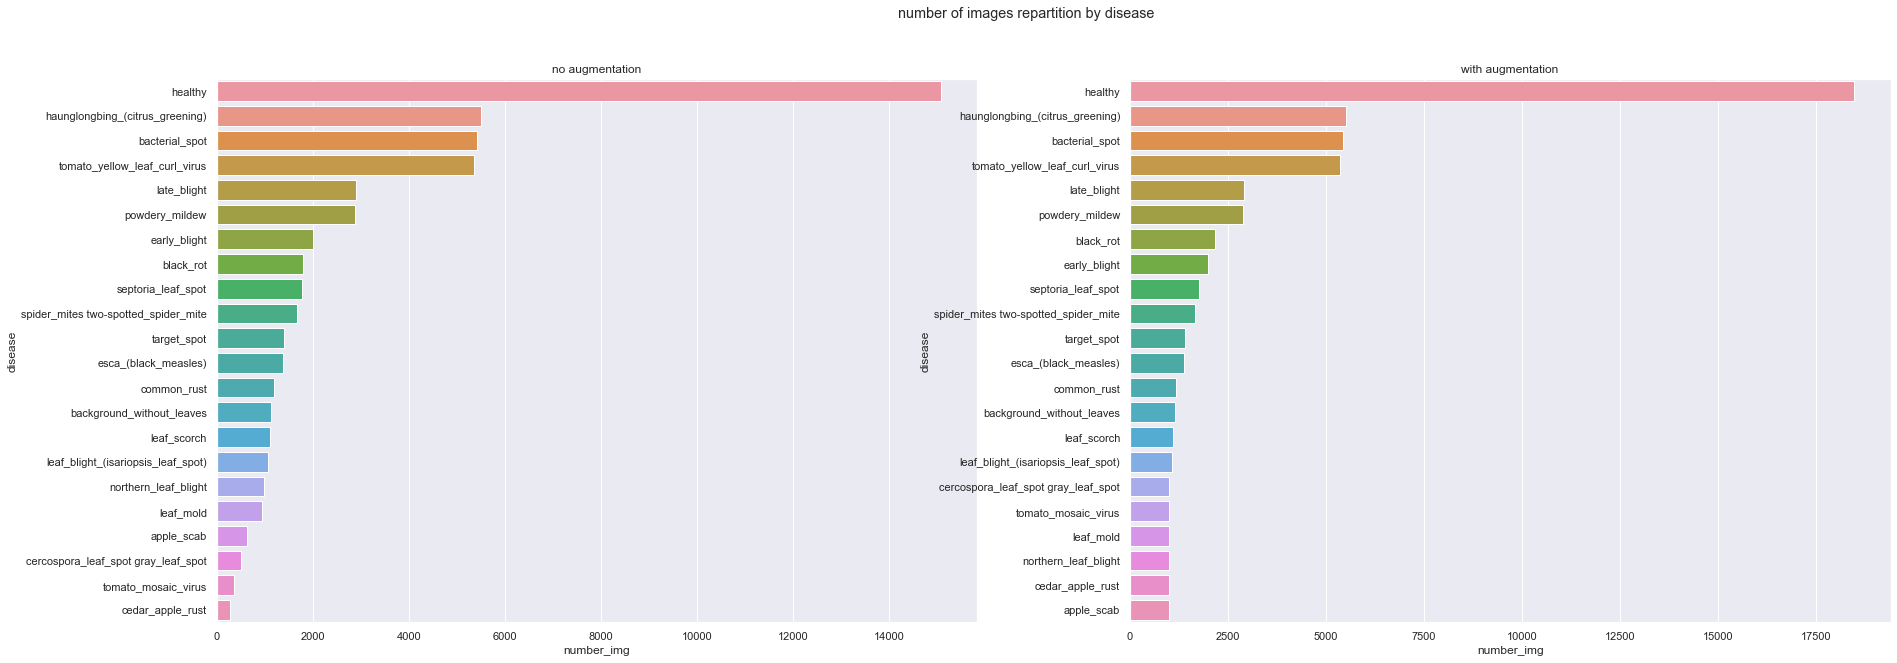

In [348]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('number of images repartition by disease')

df_no_augmentation_groupby_disease = df_no_augmentation.groupby(by='disease').sum()
df_no_augmentation_groupby_disease.reset_index(inplace=True)

df_augmentation_groupby_disease = df_augmentation.groupby(by='disease').sum()
df_augmentation_groupby_disease.reset_index(inplace=True)


sns.barplot(ax=axes[0], x="number_img", y="disease", data=df_no_augmentation_groupby_disease, order=df_no_augmentation_groupby_disease.sort_values('number_img', ascending=False).disease)
sns.barplot(ax=axes[1], x="number_img", y="disease", data=df_augmentation_groupby_disease, order=df_augmentation_groupby_disease.sort_values('number_img', ascending=False).disease)

axes[0].set_title('no augmentation')
axes[1].set_title('with augmentation')

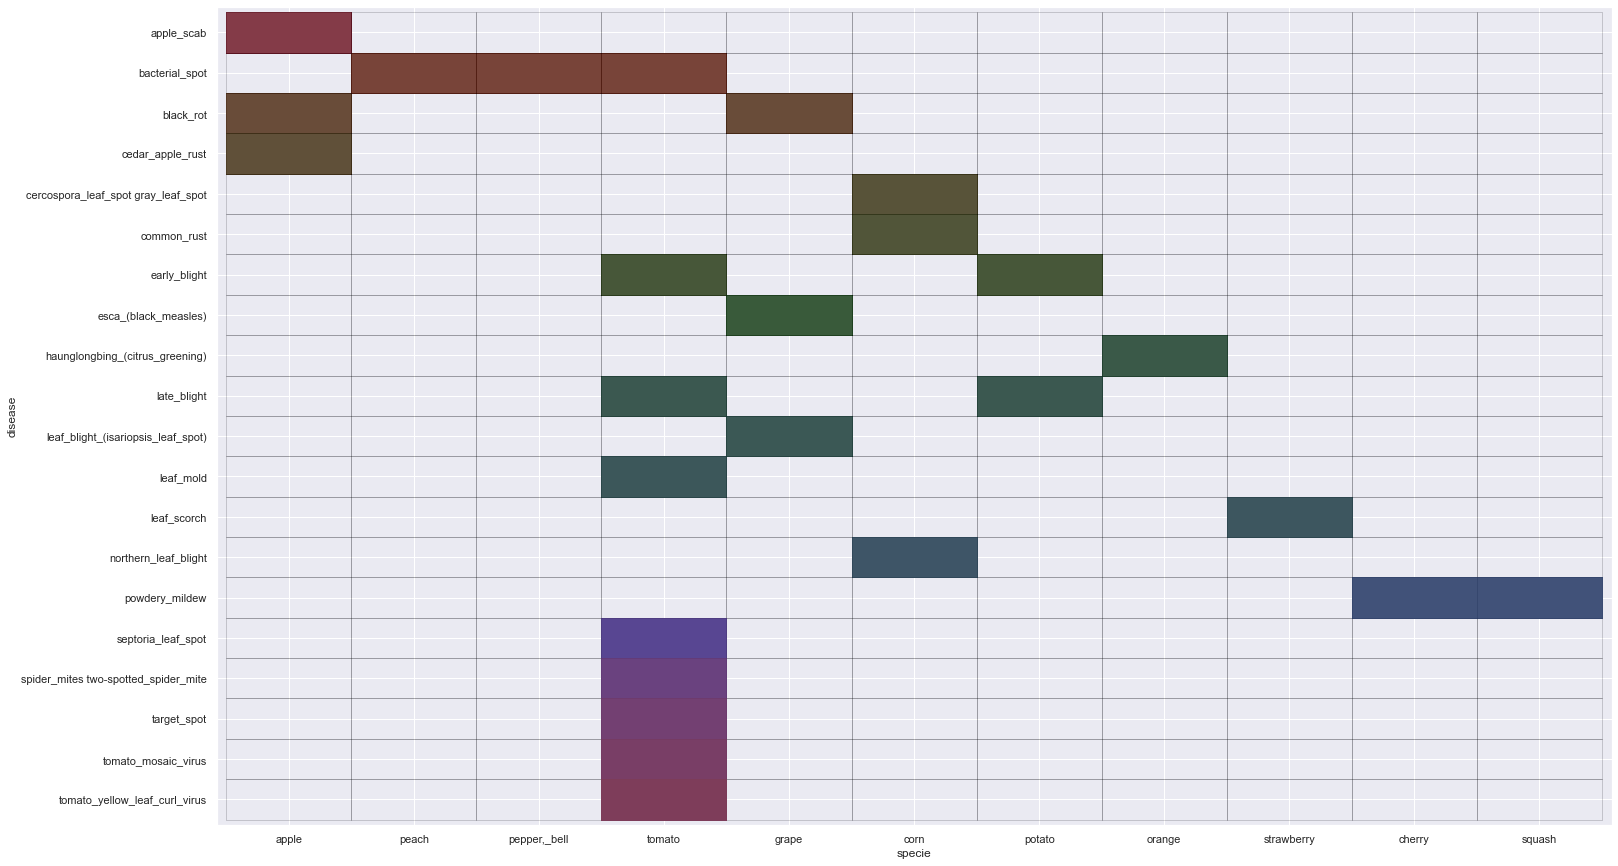

In [383]:
df_no_augmentation_groupby_disease = df_no_augmentation.groupby(by=['disease', 'specie']).sum()
df_no_augmentation_groupby_disease.reset_index(inplace=True)
df_no_augmentation_groupby_disease = df_no_augmentation_groupby_disease[~df_no_augmentation_groupby_disease['healthy']]
df_no_augmentation_groupby_disease = df_no_augmentation_groupby_disease[df_no_augmentation_groupby_disease['disease'] != 'background_without_leaves']

plt.subplots_adjust(top=1.5)
ax = sns.histplot(y="disease", x='specie', hue="disease", data=df_no_augmentation_groupby_disease, legend=False, edgecolor="#02080602", linewidth=1)
ax.margins(x=0.007, y=0.007)

# Disease family

Text(0.5, 1.0, 'with augmentation')

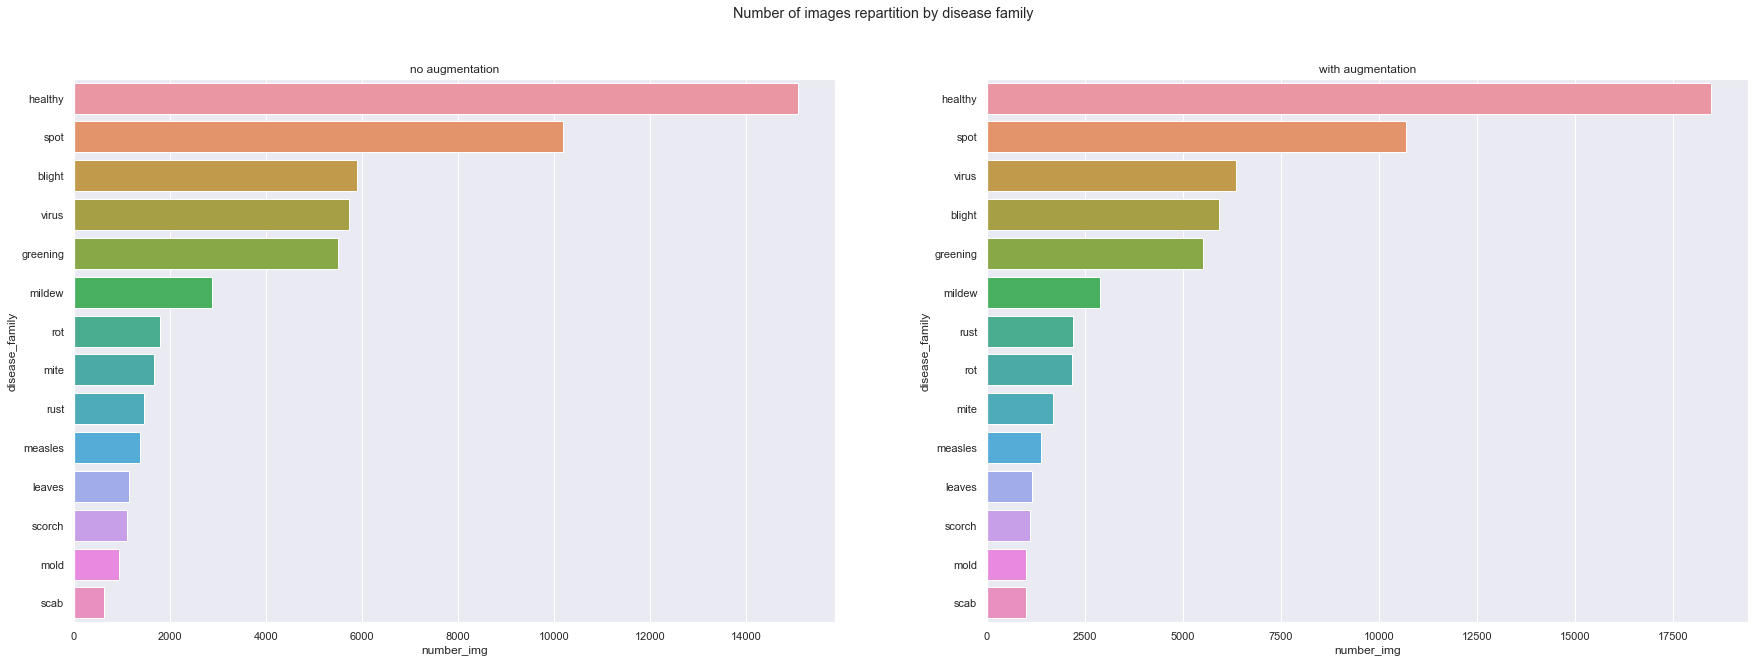

In [347]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
fig.suptitle('Number of images repartition by disease family')

df_no_augmentation_groupby_disease = df_no_augmentation.groupby(by='disease_family').sum()
df_no_augmentation_groupby_disease.reset_index(inplace=True)

df_augmentation_groupby_disease = df_augmentation.groupby(by='disease_family').sum()
df_augmentation_groupby_disease.reset_index(inplace=True)


sns.barplot(ax=axes[0], x="number_img", y="disease_family", data=df_no_augmentation_groupby_disease, order=df_no_augmentation_groupby_disease.sort_values('number_img', ascending=False).disease_family)
sns.barplot(ax=axes[1], x="number_img", y="disease_family", data=df_augmentation_groupby_disease, order=df_augmentation_groupby_disease.sort_values('number_img', ascending=False).disease_family)

axes[0].set_title('no augmentation')
axes[1].set_title('with augmentation')

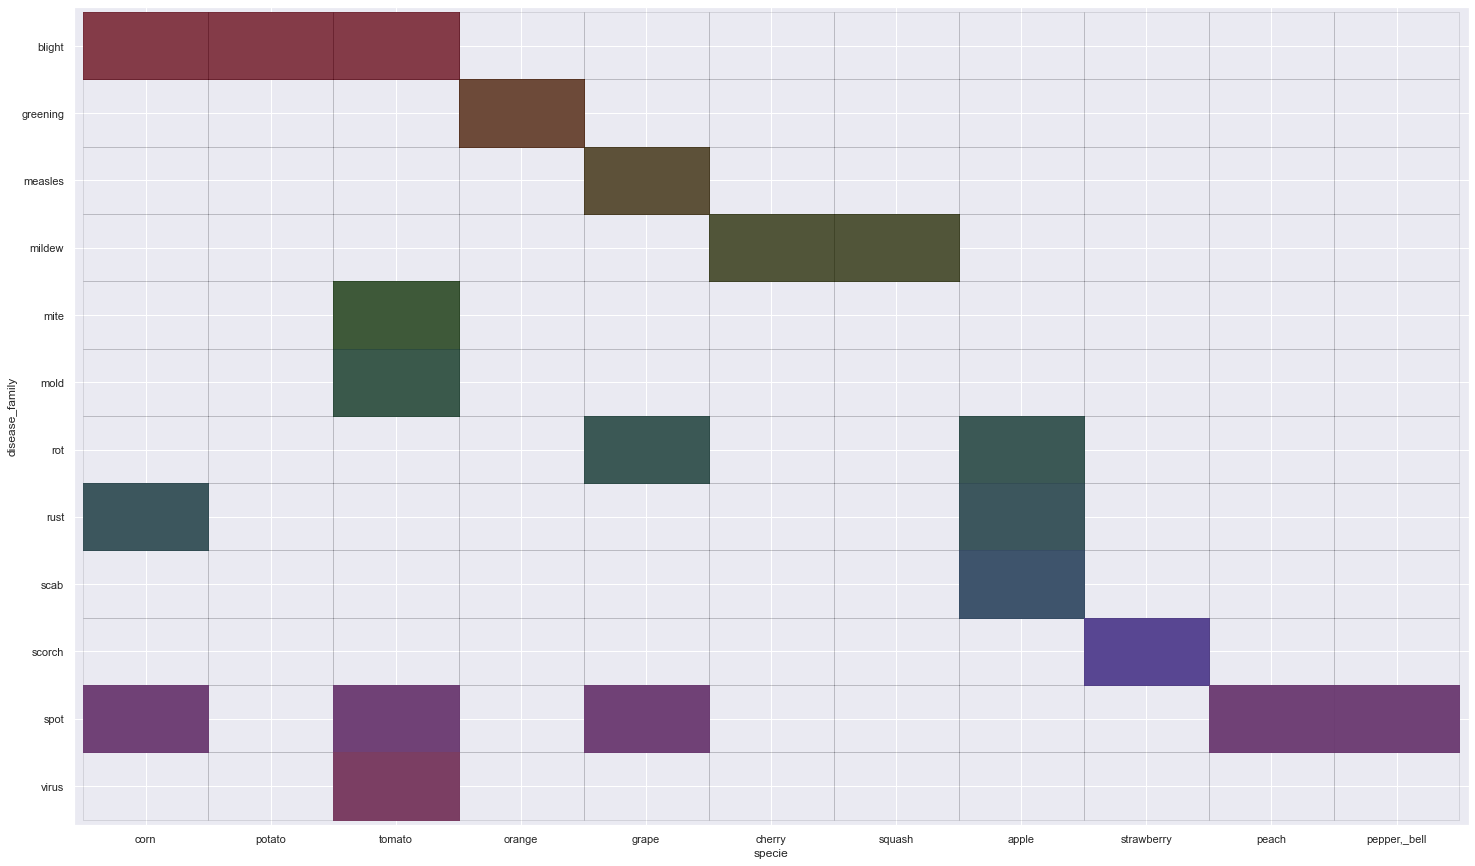

In [384]:
df_no_augmentation_groupby_disease_fam = df_no_augmentation.groupby(by=['disease_family', 'specie']).sum()
df_no_augmentation_groupby_disease_fam.reset_index(inplace=True)
df_no_augmentation_groupby_disease_fam.healthy = df_no_augmentation_groupby_disease_fam.healthy.astype(bool)
df_no_augmentation_groupby_disease_fam = df_no_augmentation_groupby_disease_fam[~df_no_augmentation_groupby_disease_fam['healthy']]
df_no_augmentation_groupby_disease_fam = df_no_augmentation_groupby_disease_fam[df_no_augmentation_groupby_disease_fam['disease'] != 'background_without_leaves']

plt.subplots_adjust(top=1.5)
ax = sns.histplot(y="disease_family", x='specie', hue="disease_family", data=df_no_augmentation_groupby_disease_fam, legend=False, edgecolor="#02080602", linewidth=1)
ax.margins(x=0.007, y=0.007)